In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [31]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [32]:
df=df[df['location']=='Argentina']
df=df[['date','new_cases']]

In [33]:
df

,date,new_cases
1632,2020-02-11,NaN
1633,2020-02-12,NaN
1634,2020-02-13,NaN
1635,2020-02-14,NaN
1636,2020-02-15,NaN
...,...,...
1873,2020-10-09,15454.0
1874,2020-10-10,15099.0
1875,2020-10-11,12428.0
1876,2020-10-12,10310.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


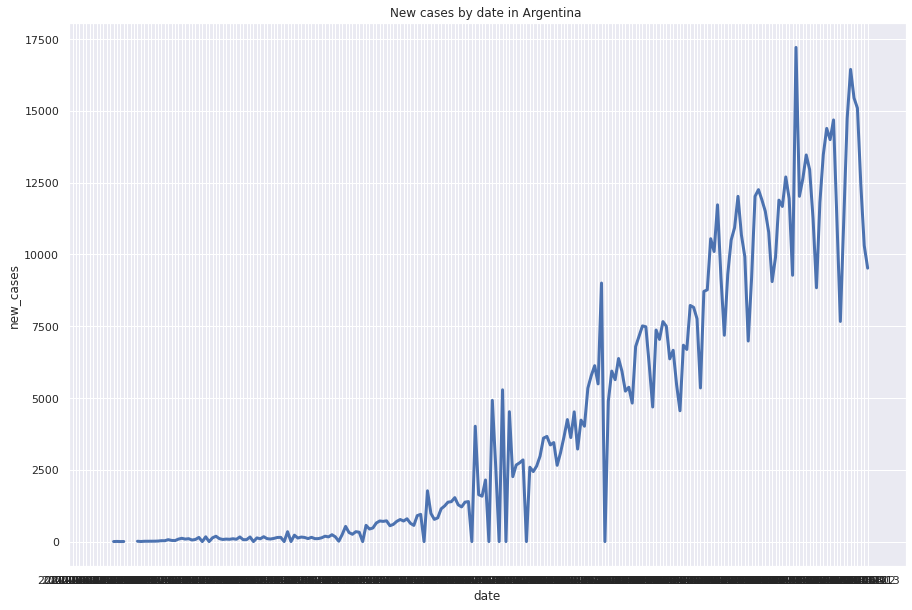

In [34]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in Argentina ')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [35]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [36]:
case_series=case_series.fillna(0)
case_series

,new_cases
1632,0.0
1633,0.0
1634,0.0
1635,0.0
1636,0.0
...,...
1873,15454.0
1874,15099.0
1875,12428.0
1876,10310.0


In [37]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [38]:
timestep=8
X_case, y_case = create_dataset(case_series, timestep)
#X_death,y_death=create_dataset(death_series,timestep)

In [39]:
train_size=int(len(case_series)*0.85)

In [40]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [41]:

n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

x_case_test=x_case_valid.reshape((x_case_valid.shape[0], x_case_valid.shape[1], n_features))




## **Model preperation:**

In [42]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
#model.add(Bidirectional(LSTM(20,activation='relu')))
#model.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(30,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=250, verbose=2,validation_data=(x_case_test,y_case_valid))

Epoch 1/250
7/7 - 0s - loss: 18986310.0000 - val_loss: 149950992.0000
Epoch 2/250
7/7 - 0s - loss: 17387380.0000 - val_loss: 142125680.0000
Epoch 3/250
7/7 - 0s - loss: 16647990.0000 - val_loss: 137453920.0000
Epoch 4/250
7/7 - 0s - loss: 16084920.0000 - val_loss: 131113224.0000
Epoch 5/250
7/7 - 0s - loss: 15181741.0000 - val_loss: 117208904.0000
Epoch 6/250
7/7 - 0s - loss: 10308204.0000 - val_loss: 39233636.0000
Epoch 7/250
7/7 - 0s - loss: 4057841.5000 - val_loss: 18528348.0000
Epoch 8/250
7/7 - 0s - loss: 3063982.0000 - val_loss: 14654843.0000
Epoch 9/250
7/7 - 0s - loss: 2474732.0000 - val_loss: 10147254.0000
Epoch 10/250
7/7 - 0s - loss: 1710057.3750 - val_loss: 6976980.5000
Epoch 11/250
7/7 - 0s - loss: 1306694.8750 - val_loss: 4956509.5000
Epoch 12/250
7/7 - 0s - loss: 1012488.8125 - val_loss: 5031599.0000
Epoch 13/250
7/7 - 0s - loss: 1044250.1875 - val_loss: 6683337.5000
Epoch 14/250
7/7 - 0s - loss: 991054.9375 - val_loss: 5575603.0000
Epoch 15/250
7/7 - 0s - loss: 987751.9

# **Check validation data:**

In [43]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+8-15)])

x_input=numpy.array(x_input)



In [44]:
x_input

array([ 8159.,  7759.,  5352.,  8713.,  8771., 10550., 10104., 11730.],
      dtype=float32)

In [45]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>8):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[9524.012]
1 day input [ 7759.     5352.     8713.     8771.    10550.    10104.    11730.
  9524.012]
[ 7759.     5352.     8713.     8771.    10550.    10104.    11730.
  9524.012]
[[[ 7759.   ]
  [ 5352.   ]
  [ 8713.   ]
  [ 8771.   ]
  [10550.   ]
  [10104.   ]
  [11730.   ]
  [ 9524.012]]]
1 day output [[6930.0405]]
2 day input [ 5352.      8713.      8771.     10550.     10104.     11730.
  9524.012   6930.0405]
[ 5352.      8713.      8771.     10550.     10104.     11730.
  9524.012   6930.0405]
[[[ 5352.    ]
  [ 8713.    ]
  [ 8771.    ]
  [10550.    ]
  [10104.    ]
  [11730.    ]
  [ 9524.012 ]
  [ 6930.0405]]]
2 day output [[8928.304]]
3 day input [ 8713.      8771.     10550.     10104.     11730.      9524.012
  6930.0405  8928.304 ]
[ 8713.      8771.     10550.     10104.     11730.      9524.012
  6930.0405  8928.304 ]
[[[ 8713.    ]
  [ 8771.    ]
  [10550.    ]
  [10104.    ]
  [11730.    ]
  [ 9524.012 ]
  [ 6930.0405]
  [ 8928.304 ]]]
3 day output [[10421.067]]
4

In [46]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [47]:
lst_output=numpy.array(lst_output)
lst_output

array([ 9524.012 ,  6930.0405,  8928.304 , 10421.067 , 11473.135 ,
       11244.98  , 10094.657 , 10786.163 ,  7893.6445, 10011.901 ,
       11826.767 , 11514.772 , 11489.636 , 11016.895 , 11845.762 ,
        8995.012 , 11333.104 , 12864.189 , 11829.412 , 13209.213 ,
       12913.826 , 13106.129 , 12563.244 , 12496.627 , 13614.445 ,
       14218.047 , 14744.122 , 15118.7295, 14397.319 , 14103.975 ,
       14132.824 , 14996.14  , 16286.332 , 17008.469 , 17084.506 ,
       16368.652 , 15675.456 ], dtype=float32)

No handles with labels found to put in legend.


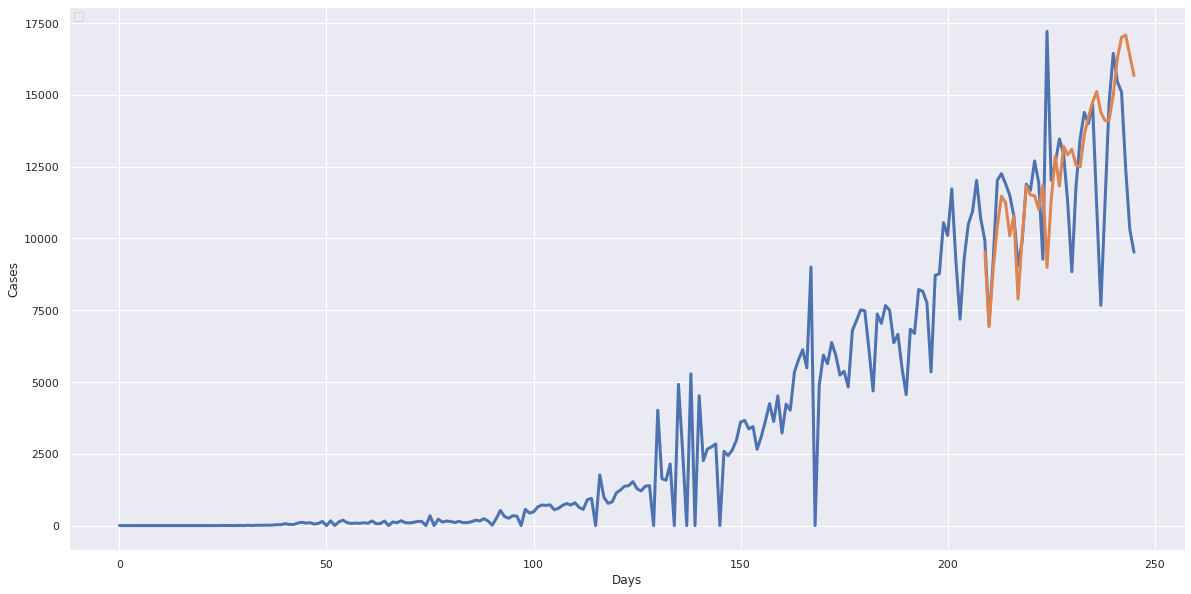

In [48]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()
#plt.plot(case_series_)

# Forecasting:

---



---



In [49]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [50]:

x_input

array([11242., 14740., 16447., 15454., 15099., 12428., 10310.,  9524.],
      dtype=float32)

In [51]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>8):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[14336.133]
1 day input [14740.    16447.    15454.    15099.    12428.    10310.     9524.
 14336.133]
[14740.    16447.    15454.    15099.    12428.    10310.     9524.
 14336.133]
[[[14740.   ]
  [16447.   ]
  [15454.   ]
  [15099.   ]
  [12428.   ]
  [10310.   ]
  [ 9524.   ]
  [14336.133]]]
1 day output [[15409.073]]
2 day input [16447.    15454.    15099.    12428.    10310.     9524.    14336.133
 15409.073]
[16447.    15454.    15099.    12428.    10310.     9524.    14336.133
 15409.073]
[[[16447.   ]
  [15454.   ]
  [15099.   ]
  [12428.   ]
  [10310.   ]
  [ 9524.   ]
  [14336.133]
  [15409.073]]]
2 day output [[15857.763]]
3 day input [15454.    15099.    12428.    10310.     9524.    14336.133 15409.073
 15857.763]
[15454.    15099.    12428.    10310.     9524.    14336.133 15409.073
 15857.763]
[[[15454.   ]
  [15099.   ]
  [12428.   ]
  [10310.   ]
  [ 9524.   ]
  [14336.133]
  [15409.073]
  [15857.763]]]
3 day output [[14146.305]]
4 day input [15099.    12428.    1031

In [52]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


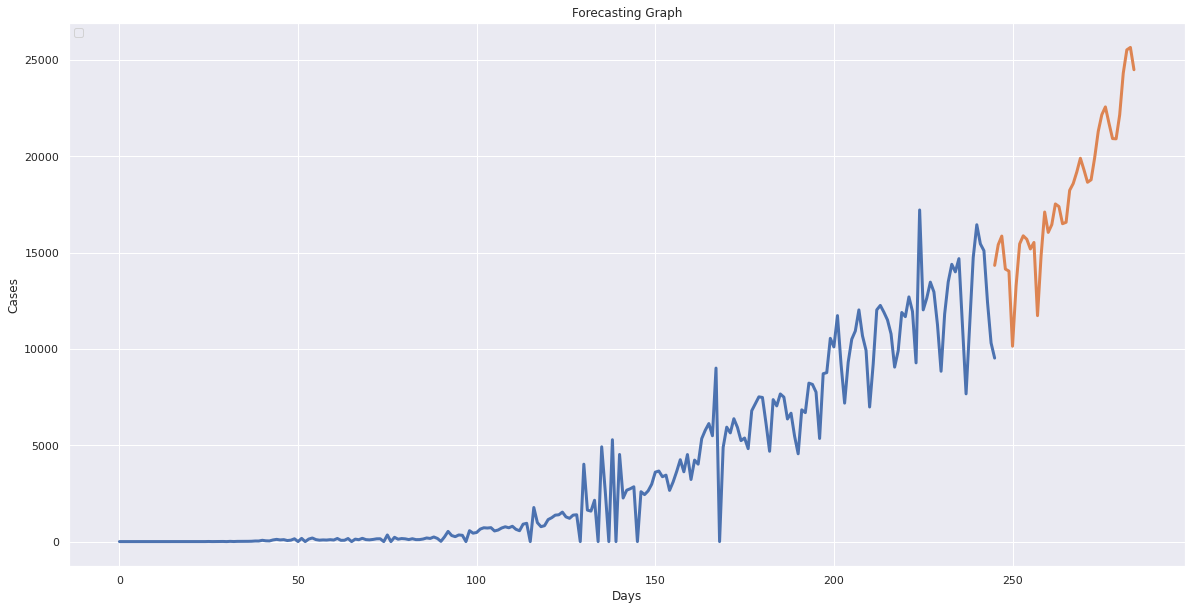

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()